In [8]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# load file 
path_df = "merged_NYC_data.csv"

NYC_df = pd.read_csv(path_df)

NYC_df.head(-1)

,Unnamed: 0,CMPLNT_NUM,DATE,OFNS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,...,BX_CASE_COUNT,BX_DEATH_COUNT,BK_CASE_COUNT,BK_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT
0,0,798923821,2/29/2020,PETIT LARCENY,18-24,WHITE HISPANIC,M,PATROL BORO BRONX,65+,WHITE HISPANIC,...,0,0,0,0,1,0,0,0,0,0
1,1,479875746,2/29/2020,ROBBERY,UNKNOWN,BLACK,M,PATROL BORO BKLYN NORTH,25-44,BLACK,...,0,0,0,0,1,0,0,0,0,0
2,2,246890158,2/29/2020,OFF. AGNST PUB ORD SENSBLTY &,25-44,UNKNOWN,U,PATROL BORO MAN SOUTH,UNKNOWN,UNKNOWN,...,0,0,0,0,1,0,0,0,0,0
3,3,125238605,2/29/2020,PETIT LARCENY,NaN,NaN,NaN,PATROL BORO STATEN ISLAND,65+,WHITE,...,0,0,0,0,1,0,0,0,0,0
4,4,339344566,2/29/2020,GRAND LARCENY,NaN,NaN,NaN,PATROL BORO BRONX,25-44,WHITE HISPANIC,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229677,229677,538117770,9/29/2020,CRIMINAL MISCHIEF & RELATED OF,UNKNOWN,UNKNOWN,U,PATROL BORO BKLYN NORTH,UNKNOWN,UNKNOWN,...,64,3,334,2,81,0,174,2,33,0
229678,229678,269176196,9/29/2020,HARRASSMENT 2,45-64,WHITE,M,PATROL BORO BKLYN SOUTH,25-44,WHITE,...,64,3,334,2,81,0,174,2,33,0
229679,229679,234139730,9/29/2020,DANGEROUS WEAPONS,25-44,WHITE,M,PATROL BORO MAN SOUTH,UNKNOWN,UNKNOWN,...,64,3,334,2,81,0,174,2,33,0
229680,229680,796495481,9/29/2020,CRIMINAL MISCHIEF & RELATED OF,25-44,BLACK,F,PATROL BORO BKLYN NORTH,25-44,BLACK,...,64,3,334,2,81,0,174,2,33,0


In [9]:
# caculate
bx_case = NYC_df["BX_CASE_COUNT"][229681]
bx_death = NYC_df["BX_DEATH_COUNT"][229681]
bk_case = NYC_df["BK_CASE_COUNT"][229681]
bk_death = NYC_df["BK_DEATH_COUNT"][229681]
mn_case = NYC_df["MN_CASE_COUNT"][229681]
mn_death = NYC_df["MN_DEATH_COUNT"][229681]
qn_case = NYC_df["QN_CASE_COUNT"][229681]
qn_death = NYC_df["QN_DEATH_COUNT"][229681]
si_case = NYC_df["SI_CASE_COUNT"][229681]
si_death = NYC_df["SI_DEATH_COUNT"][229681]
total_covid_case = bx_case + bk_case + mn_case + qn_case + si_case 
total_covid_death = bx_death + bk_death + mn_death + qn_death + si_death

# Feb/29 ~ Sep/29
case_death_df = pd.DataFrame({"BX_COVID_Case" : [bx_case], "BX_Death" : [bx_death], 
                              "BK_COVID_Case" : [bk_case], "BK_Dath" : [bk_death], 
                              "MN_COVID_Case" : [mn_case], "MN_Dath" : [mn_death],
                              "QN_COVID_Case" : [qn_case], "QN_Death" : [qn_death],
                              "SI_COVID_Case" : [si_case], "SI_Dath" : [si_death],
                              "Total_COVID_Case" : [total_covid_case], "Total_Death": [total_covid_death]})
case_death_df

,BX_COVID_Case,BX_Death,BK_COVID_Case,BK_Dath,MN_COVID_Case,MN_Dath,QN_COVID_Case,QN_Death,SI_COVID_Case,SI_Dath,Total_COVID_Case,Total_Death
0,64,3,334,2,81,0,174,2,33,0,686,7


In [10]:
# total criminal feb~sep
total_crime_df = len(NYC_df["CMPLNT_NUM"].unique())
total_crime = pd.DataFrame({"Total Crime" : [total_crime_df]})
total_crime_covid = pd.DataFrame({"Total Crime" : [total_crime_df], "Total COVID Case" : [total_covid_case]})
total_crime_covid

,Total Crime,Total COVID Case
0,229683,686


In [11]:
# crime age group feb~sep
#age = NYC_df['SUSP_AGE_GROUP'].value_counts().rename("Age Group")
#age_df = pd.DataFrame(age)
#age_df

age_count_df = NYC_df.groupby("SUSP_AGE_GROUP")["CMPLNT_NUM"].nunique()
percentages_age_df = ((age_count_df/total_crime_df) * 100).round(2)

age_df = pd.DataFrame({"Total Count": age_count_df, "Percentage of Age": percentages_age_df})
age_df["Percentage of Age"] = age_df["Percentage of Age"].map("{0:,.2f}%".format)
age_df.drop(index=['-12', '-965', '1925', '2019', '2020'], inplace=True)
age_df

,Total Count,Percentage of Age
SUSP_AGE_GROUP,,
18-24,16085,7.00%
25-44,54988,23.94%
45-64,18431,8.02%
65+,1804,0.79%
<18,3286,1.43%
UNKNOWN,81501,35.48%


In [13]:
# race group feb~sep
#race = NYC_df['SUSP_RACE'].value_counts().rename("Race")
#race_df = pd.DataFrame(race)
#race_df

race_count_df = NYC_df.groupby("SUSP_RACE")["CMPLNT_NUM"].nunique()
percentages_race_df = ((race_count_df/total_crime_df) * 100).round(2)

race_df = pd.DataFrame({"Total Count": race_count_df, "Percentage of Race": percentages_race_df})
#race_df["Percentage of Crime"] = gender_df["Percentage of Crime"].map("{0:,.2f}%".format)

race_df

,Total Count,Percentage of Race
SUSP_RACE,,
AMERICAN INDIAN/ALASKAN NATIVE,340,0.15
ASIAN / PACIFIC ISLANDER,6077,2.65
BLACK,63282,27.55
BLACK HISPANIC,8957,3.90
UNKNOWN,54188,23.59
WHITE,15794,6.88
WHITE HISPANIC,27467,11.96


In [14]:
# neighborhood feb~sep
#neighborhood = NYC_df['PATROL_BORO'].value_counts().rename("Neighborhood")
#nb_df = pd.DataFrame(neighborhood)
#nb_df


nb_count_df = NYC_df.groupby("PATROL_BORO")["CMPLNT_NUM"].nunique()
percentages_nb_df = ((nb_count_df/total_crime_df) * 100).round(2)
nb_df = pd.DataFrame({"Total Count": nb_count_df, "Percentage of Crime": percentages_nb_df})
#nb_df["Percentage of Crime"] = gender_df["Percentage of Crime"].map("{0:,.2f}%".format)
nb_df

,Total Count,Percentage of Crime
PATROL_BORO,,
PATROL BORO BKLYN NORTH,34168,14.88
PATROL BORO BKLYN SOUTH,32797,14.28
PATROL BORO BRONX,50721,22.08
PATROL BORO MAN NORTH,28406,12.37
PATROL BORO MAN SOUTH,23929,10.42
PATROL BORO QUEENS NORTH,25661,11.17
PATROL BORO QUEENS SOUTH,24230,10.55
PATROL BORO STATEN ISLAND,9473,4.12


In [15]:
# caculate gender 
gender_count_df = NYC_df.groupby("SUSP_SEX")["CMPLNT_NUM"].nunique()
percentages_df = ((gender_count_df/total_crime_df) * 100).round(2)

gender_df = pd.DataFrame({"Total Count": gender_count_df, "Percentage of Crime": percentages_df})
gender_df["Percentage of Crime"] = gender_df["Percentage of Crime"].map("{0:,.2f}%".format)

gender_df

,Total Count,Percentage of Crime
SUSP_SEX,,
F,26984,11.75%
M,102058,44.43%
U,47063,20.49%


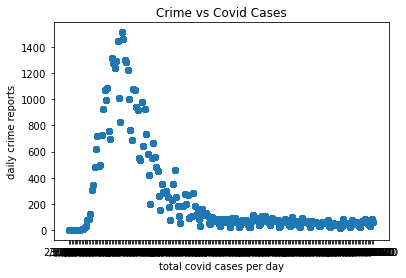

In [25]:
#bx_covid per day
x_values= NYC_df['DATE']
y_values = NYC_df['BX_CASE_COUNT']

plt.scatter(x_values, y_values)
plt.title('Crime vs Covid Cases')
plt.xlabel('total covid cases per day')
plt.ylabel('daily crime reports')

# investigate outlier
plt.show()

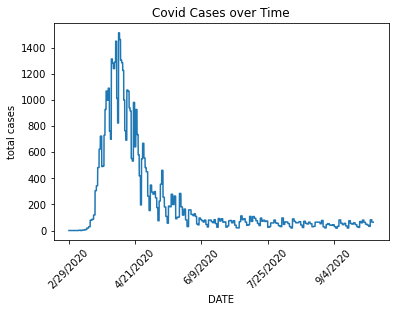

In [26]:
plot = NYC_df.plot.line(x='DATE', y='BX_CASE_COUNT', 
                            title='Covid Cases over Time',
                            ylabel = 'total cases', legend=False, rot=45)

In [ ]:
plot2 = NYC_df.plot.line(x='DATE', y='', 
                           title='Crime Reports over Time',
                            ylabel = 'total reports', legend=False, rot = 45)